## Catboost Classification Algorithm in Python

##### Muhammad Hendrawan Hidayat - Intermediate Python Mentor

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from catboost import CatBoostClassifier 

plt.style.use('seaborn')
%matplotlib inline

### Data Loading

In [82]:
df = pd.read_csv('Loan_Prediction_Dataset.csv')

### Exploratory Data Analysis

In [83]:
# check dataset shape

print('Jumlah Baris =', df.shape[0])
print('Jumlah Kolom =', df.shape[1])

Jumlah Baris = 614
Jumlah Kolom = 13


In [85]:
# check 5 first data

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
# check 5 last data

df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [87]:
# descript data per features

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_Type Null_num Null_pct Unique_num Unique_Sample'.split())
desc_df

,Feature,Data_Type,Null_num,Null_pct,Unique_num,Unique_Sample
0,Loan_ID,object,0,0.000000,614,"[LP001002, LP001003, LP001005, LP001006]"
1,Gender,object,13,2.117264,2,"[Male, Female, nan]"
2,Married,object,3,0.488599,2,"[No, Yes, nan]"
3,Dependents,object,15,2.442997,4,"[0, 1, 2, 3+]"
4,Education,object,0,0.000000,2,"[Graduate, Not Graduate]"
5,Self_Employed,object,32,5.211726,2,"[No, Yes, nan]"
6,ApplicantIncome,int64,0,0.000000,505,"[5849, 4583, 3000, 2583]"
7,CoapplicantIncome,float64,0,0.000000,287,"[0.0, 1508.0, 2358.0, 4196.0]"
8,LoanAmount,float64,22,3.583062,203,"[nan, 128.0, 66.0, 120.0]"
9,Loan_Amount_Term,float64,14,2.280130,10,"[360.0, 120.0, 240.0, nan]"


In [89]:
# check target features

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [90]:
# check number of missing data

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
# check number of duplicated data

df.duplicated().sum()

0

In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Univariate Analysis

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

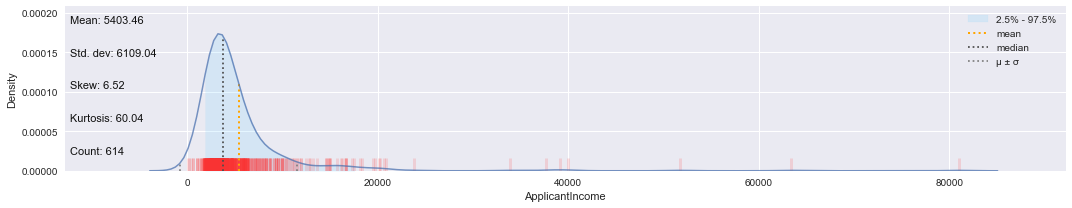

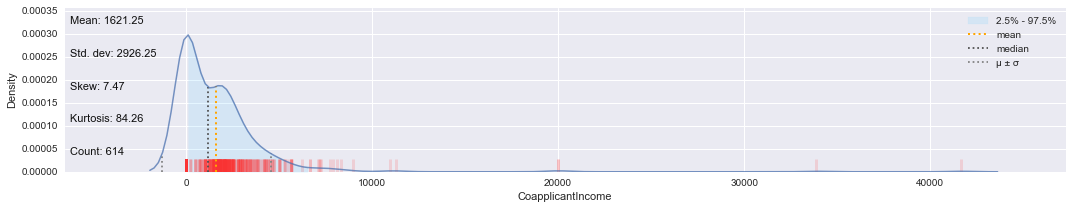

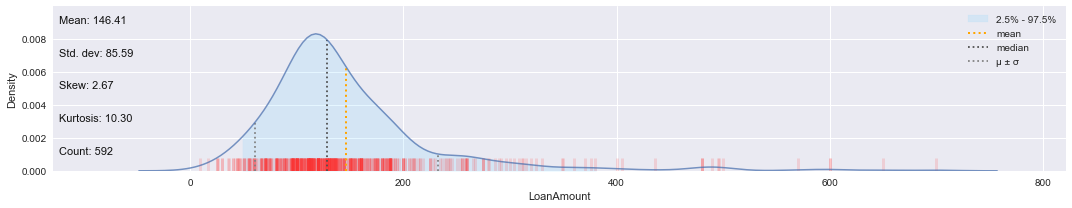

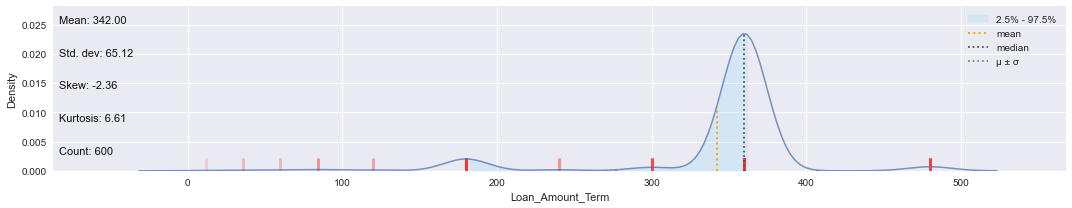

In [20]:
klib.dist_plot(df, size = 3)

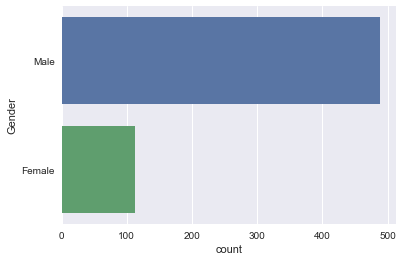

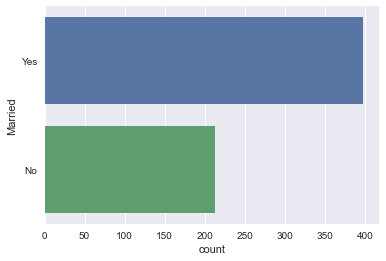

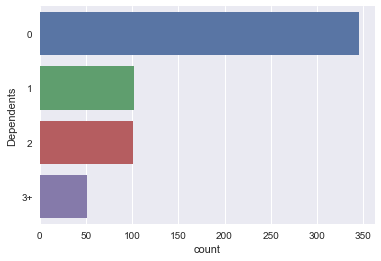

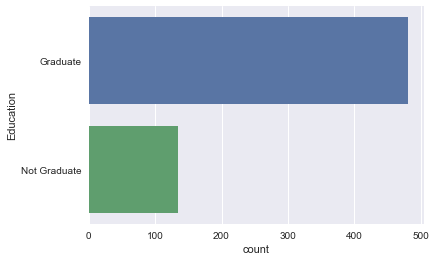

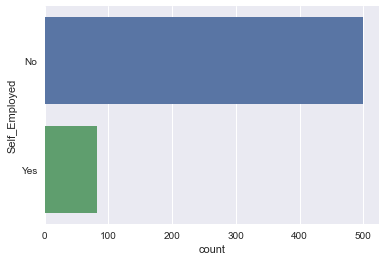

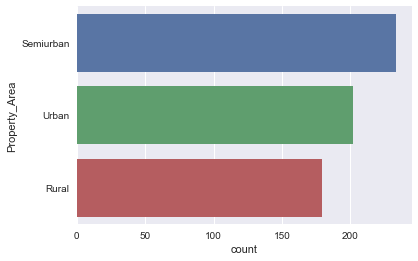

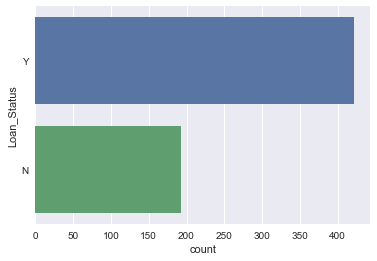

In [21]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 15:
        sns.countplot(y=column,
                      data=df,
                     order= df[column].value_counts().index)
        plt.show()

#### Multivariate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

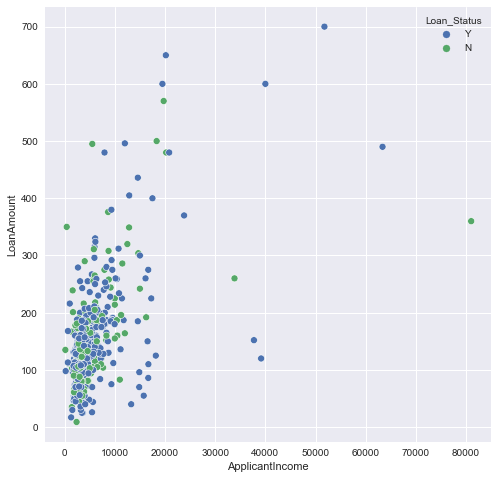

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df,hue='Loan_Status')

As the loan amount increases Applicant income also increases. but loan is not granted alone on these both relationship as higher loan amounts with lower income lso have been accepted and lower loan amount with higher applicant income are also rejected.

Text(0.5, 1.0, 'Correlation Factors Heat Map')

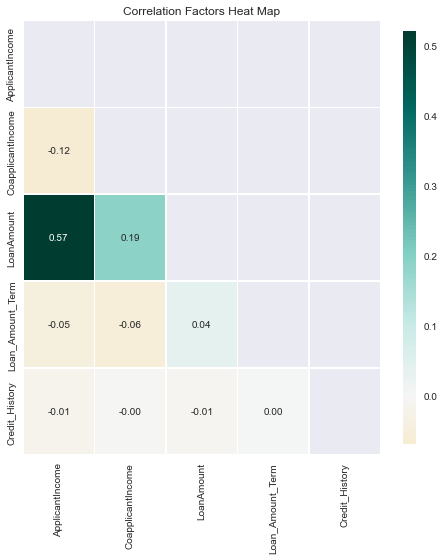

In [29]:
klib.corr_plot(df, annot=True, figsize = (8,8)).set_title('Correlation Factors Heat Map')

### Feature Engineering

In [93]:
# drop id column

df.drop('Loan_ID',axis=1,inplace=True)

In [94]:
# fill null values of categorical features with mode

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [95]:
# fill null value of continuos feature LoanAmount with median bcs its high skewness

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [96]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

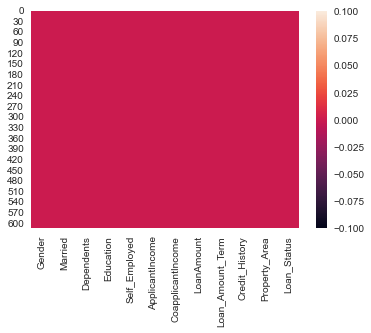

In [97]:
sns.heatmap(df.isna())

In [163]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df['Credit_History'] = df['Credit_History'].astype(int)

In [99]:
df["Loan_Status"] = np.where(df["Loan_Status"] == 'Y', 1, 0)

In [145]:
# descript data per features

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_Type Null_num Null_pct Unique_num Unique_Sample'.split())
desc_df

,Feature,Data_Type,Null_num,Null_pct,Unique_num,Unique_Sample
0,Gender,object,0,0.0,2,"[Male, Female]"
1,Married,object,0,0.0,2,"[No, Yes]"
2,Dependents,object,0,0.0,4,"[0, 1, 2, 3+]"
3,Education,object,0,0.0,2,"[Graduate, Not Graduate]"
4,Self_Employed,object,0,0.0,2,"[No, Yes]"
5,ApplicantIncome,float64,0,0.0,487,"[8.674025985443025, 8.430109084509125, 8.00636..."
6,CoapplicantIncome,float64,0,0.0,280,"[0.0, 11.467456829149778, 13.31009842282822, 1..."
7,LoanAmount,float64,0,0.0,191,"[5.039684199579492, 4.04124002062219, 4.932424..."
8,Loan_Amount_Term,float64,0,0.0,10,"[360.0, 120.0, 240.0, 180.0]"
9,Credit_History,object,0,0.0,2,"[1, 0]"


#### Removing Outliers

In [101]:
# function to choose the right threshold

def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [102]:
# using zscore method to remove outliers

from scipy.stats import zscore
z=np.abs(zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]))
threshold(z,df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

With threshold 3.0 data loss is 4.07%
With threshold 3.2 data loss is 3.42%
With threshold 3.4 data loss is 3.42%
With threshold 3.6 data loss is 3.26%
With threshold 3.8 data loss is 3.26%
With threshold 4.0 data loss is 2.77%
With threshold 4.2 data loss is 2.44%
With threshold 4.4 data loss is 2.28%
With threshold 4.6 data loss is 2.28%
With threshold 4.8 data loss is 2.12%


In [103]:
# we use threshold as 3.6 because data is expensive and we already have less of data

df=df[(z<3.6).all(axis=1)]

In [104]:
print('Jumlah Baris =', df.shape[0])
print('Jumlah Kolom =', df.shape[1])

Jumlah Baris = 594
Jumlah Kolom = 12


#### Removing Skewness

In [105]:
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew())

ApplicantIncome      2.283326
CoapplicantIncome    1.528633
LoanAmount           1.432997
dtype: float64


In [106]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

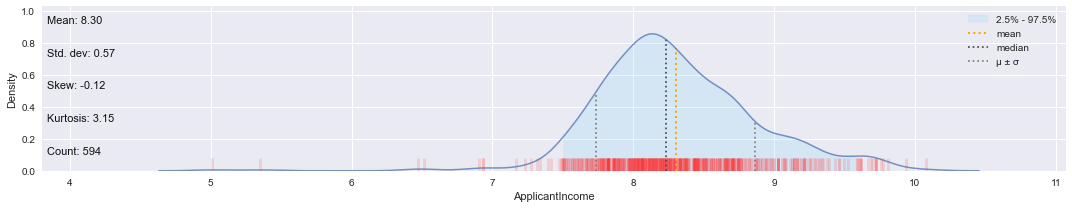

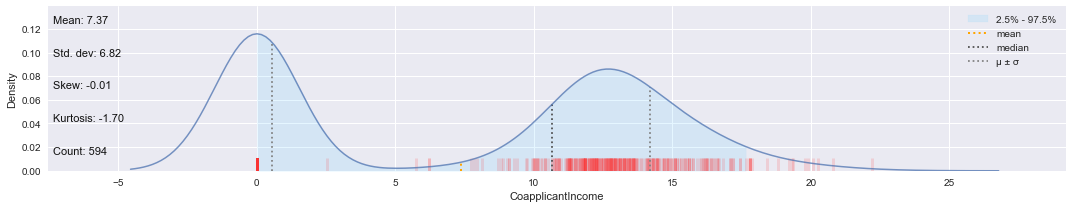

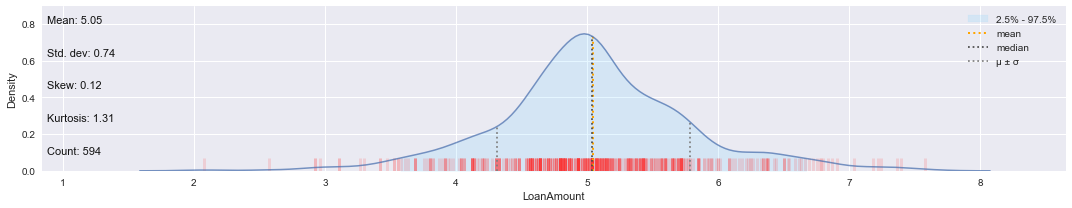

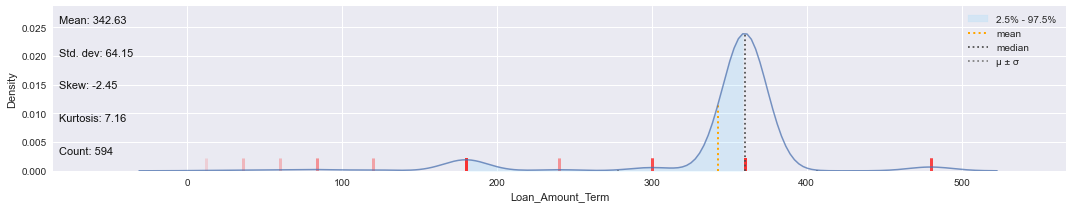

In [107]:
klib.dist_plot(df, size = 3)

### Processing Data

In [164]:
# splitting features and labels

x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [167]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status            int32
dtype: object

In [205]:
cat_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

In [114]:
df['Loan_Status'].value_counts(normalize=True)

1    0.691919
0    0.308081
Name: Loan_Status, dtype: float64

In [299]:
w1 = df['Loan_Status'].value_counts(normalize=True)[0]
w2 = df['Loan_Status'].value_counts(normalize=True)[1]

##### Split Dataset

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=48)

#### Define Model

In [311]:
model_cb = CatBoostClassifier(iterations=100, learning_rate = 0.01,
                              random_seed = 23,
                              class_weights = [w1, w2],
                              cat_features= cat_features,
                              eval_metric="AUC",
                              od_type = "Iter", # overfit detector
                              od_wait = 20) # most recent best iteration to wait before stopping

##### Train Model

In [312]:
model_cb.fit(x_train, y_train, 
             eval_set=(x_test, y_test), use_best_model=True)

0:	test: 0.6250000	best: 0.6250000 (0)	total: 29.4ms	remaining: 2.91s
1:	test: 0.6145833	best: 0.6250000 (0)	total: 55ms	remaining: 2.69s
2:	test: 0.6424210	best: 0.6424210 (2)	total: 115ms	remaining: 3.71s
3:	test: 0.6546336	best: 0.6546336 (3)	total: 141ms	remaining: 3.39s
4:	test: 0.6386494	best: 0.6546336 (3)	total: 174ms	remaining: 3.31s
5:	test: 0.6514009	best: 0.6546336 (3)	total: 200ms	remaining: 3.14s
6:	test: 0.6580460	best: 0.6580460 (6)	total: 227ms	remaining: 3.02s
7:	test: 0.6478089	best: 0.6580460 (6)	total: 262ms	remaining: 3.02s
8:	test: 0.6582256	best: 0.6582256 (8)	total: 290ms	remaining: 2.93s
9:	test: 0.6575072	best: 0.6582256 (8)	total: 308ms	remaining: 2.77s
10:	test: 0.6564296	best: 0.6582256 (8)	total: 334ms	remaining: 2.7s
11:	test: 0.6578664	best: 0.6582256 (8)	total: 359ms	remaining: 2.63s
12:	test: 0.6729526	best: 0.6729526 (12)	total: 391ms	remaining: 2.62s
13:	test: 0.6783405	best: 0.6783405 (13)	total: 423ms	remaining: 2.6s
14:	test: 0.6761853	best: 0.67

In [313]:
y_train_pred = model_cb.predict(x_train)
y_test_pred = model_cb.predict(x_test)

In [314]:
confusion_matrix(y_train, y_train_pred)

array([[ 72,  79],
       [  6, 318]], dtype=int64)

In [315]:
confusion_matrix(y_test, y_test_pred)

array([[ 8, 24],
       [ 0, 87]], dtype=int64)

#### Interpret Model

In [208]:
import shap

from catboost import CatBoostClassifier, Pool
shap_values = model_cb.get_feature_importance(Pool(x_test, label=y_test,cat_features=cat_features) ,
                                               type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], x_test.iloc[0,:])

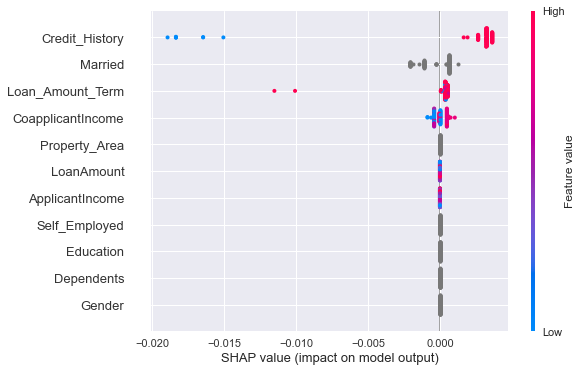

In [209]:
shap.summary_plot(shap_values, x_test)